<a href="https://colab.research.google.com/github/Vishnukvsvk/ML-Using-Python-IBM/blob/master/NonLinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing** **Required** **Libraries**

In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

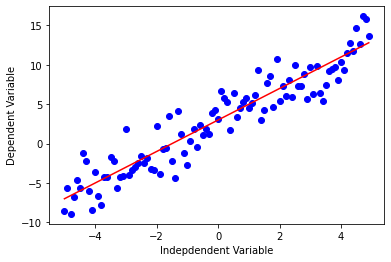

In [11]:
x=np.arange(-5.0,5.0,0.1)

y= 2*(x) +3
y_noise = 2 * np.random.normal(size=x.size)
ydata = y + y_noise

plt.plot(x,ydata, 'bo') #b=blue,g=green && o=circle,s=square
plt.plot(x,y,'-r')
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

#**Non-Linear Regression**

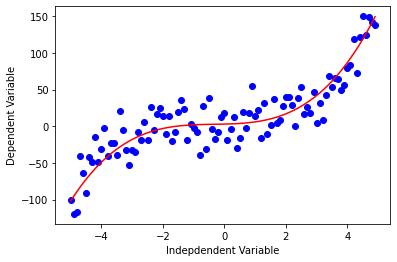

In [12]:
x = np.arange(-5.0, 5.0, 0.1)

##You can adjust the slope and intercept to verify the changes in the graph
y = 1*(x**3) + 1*(x**2) + 1*x + 3
y_noise = 20 * np.random.normal(size=x.size)
ydata = y + y_noise
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

**Quadartic**

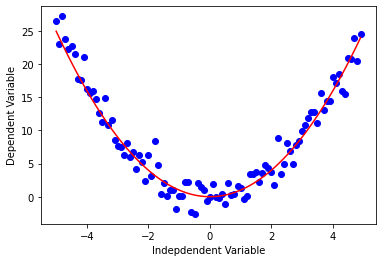

In [14]:
x = np.arange(-5.0, 5.0, 0.1)


y = np.power(x,2)
y_noise = 2 * np.random.normal(size=x.size)
ydata = y + y_noise
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

**Exponential**

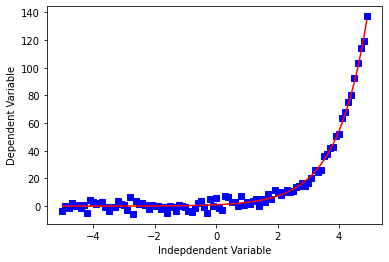

In [17]:
x = np.arange(-5.0,5.0,0.1)

y=np.exp(x)
y_noise = 3 * np.random.normal(size=x.size)
ydata=y+y_noise
plt.plot(x,ydata,'bs')
plt.plot(x,y,'-r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

**Logarithmic**

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


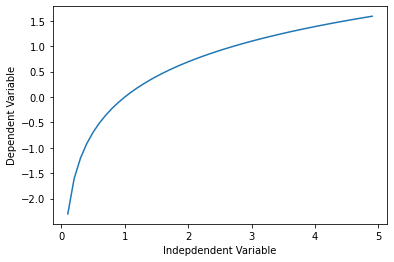

In [18]:
X = np.arange(-5.0, 5.0, 0.1)

Y = np.log(X)

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

**Sigmoid**

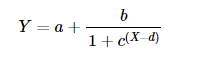

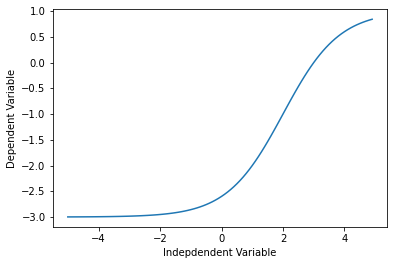

In [19]:
X = np.arange(-5.0, 5.0, 0.1)


Y = 1-4/(1+np.power(3, X-2))

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

#**Example of Non-Linear Regression**

In [20]:
import numpy as np
import pandas as pd

#downloading dataset
!wget -nv -O china_gdp.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/china_gdp.csv
    
df = pd.read_csv("china_gdp.csv")
df.head(10)

2020-05-09 06:38:33 URL:https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/china_gdp.csv [1218/1218] -> "china_gdp.csv" [1]


,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10
5,1965,6.970915e+10
6,1966,7.587943e+10
7,1967,7.205703e+10
8,1968,6.999350e+10
9,1969,7.871882e+10


**Plotting** **Dataset**

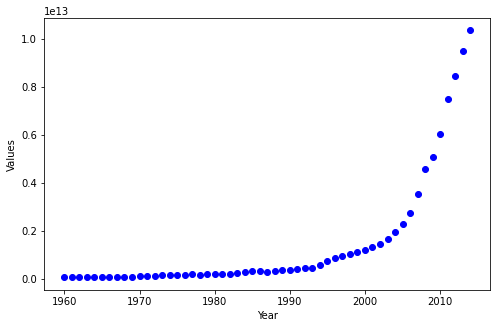

In [23]:
plt.figure(figsize=(8,5))

x_data, y_data = (df["Year"].values, df["Value"].values)
plt.plot(x_data,y_data,'bo')
plt.xlabel('Year')
plt.ylabel('Values')
plt.show()

*By visualising the graph, we can say that its a logistic function*

Formula

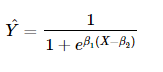

**Building Model**

In [0]:
def sigmoid(x,beta_1,beta_2):
  y = 1/(1 + np.exp(-beta_1*(x-beta_2)))
  return y

*Sample sigmoid line*

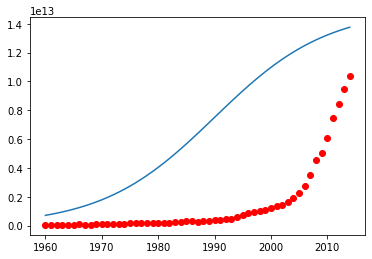

In [28]:
beta_1=0.10
beta_2=1990.0

Y_pred = sigmoid(x_data,beta_1,beta_2)

#Intial Prediction
plt.plot(x_data, Y_pred*15000000000000.)
plt.plot(x_data, y_data, 'ro')

In [0]:
#Normalizing the data
xdata = x_data/max(x_data)
ydata = y_data/max(y_data)

***Finding best parameters by using optimization technique***

In [30]:
from scipy.optimize import curve_fit

popt, pcov = curve_fit(sigmoid,xdata,ydata)

#Print final parameters
print("beta_1 = %f , beta_2 = %f " % (popt[0],popt[1]))

beta_1 = 690.453017 , beta_2 = 0.997207 


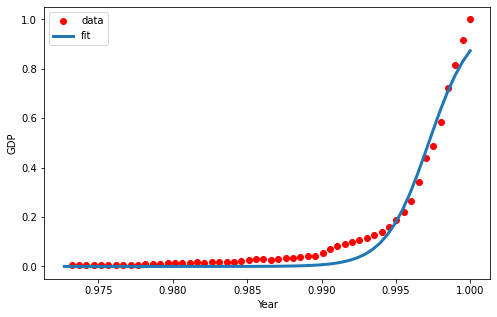

In [32]:
x = np.linspace(1960,2015,55)
x = x/max(x)
plt.figure(figsize=(8,5))
y = sigmoid(x, *popt)
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x,y, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

**Accuracy of model**

In [33]:
msk = np.random.rand(len(df)) < 0.8
train_x = xdata[msk]
test_x = xdata[~msk]
train_y = ydata[msk]
test_y = ydata[~msk]

#Buid model using Training dataset
popt,pcov = curve_fit(sigmoid,train_x,train_y)

#Predict using test dataset
y_hat = sigmoid(test_x, *popt)

#evaluation
print("MAE: %.2f" %  np.mean(np.absolute(y_hat-test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - test_y) ** 2))
from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(y_hat , test_y) )

MAE: 0.03
Residual sum of squares (MSE): 0.00
R2-score: 0.98
